<a href="https://colab.research.google.com/github/Massato01/Number-Identification-with-Neual-Network/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Number Identification with Neural Network***

In [51]:
import numpy             as np
import matplotlib.pyplot as plt
from keras.datasets      import mnist # Numbers form 0 to 9
from keras.models        import Sequential
from keras.layers        import Dense, Dropout
from keras.utils         import np_utils
from sklearn.metrics     import confusion_matrix

In [52]:
# mnist automaticly divides the data between TRAIN and TEST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Text(0.5, 1.0, '0')

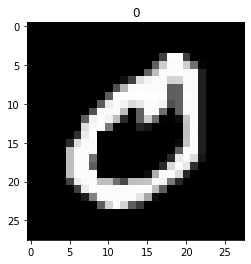

In [53]:
# Visualizing specific images
plt.imshow(X_train[21], cmap = 'gray')
plt.title(y_train[21])

In [54]:
# Changing the dimension --> originaly was 28x28, we need 784
np.prod(X_test.shape[1:])

# Formating the X train and Test data
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [55]:
# Normalizing the data transforming into float type and dividing by 225
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 255 is the max value for a pixel
X_train /= 255
X_test /= 255

In [56]:
# Transforming classes into DUMMY format (True = 1, False = 0)
# 10 classes -> numbers from 0 to 9
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## ***Structuring the Neural Network***

In [57]:
# - Neural Network structure: 784 - 64 - 64 - 64 - 10
# - Dropout it's used to avoid overffiting
neural_network = Sequential()

neural_network.add(Dense(units = 64, activation = 'relu', input_dim = 784))
neural_network.add(Dropout(0.2)) # 20% dos dados da camada serão zerados

neural_network.add(Dense(units = 64, activation = 'relu'))
neural_network.add(Dropout(0.2))

neural_network.add(Dense(units = 64, activation = 'relu'))
neural_network.add(Dropout(0.2))

# Camada de saída com 10 unidades, pois temos 10 opções de números, softmax para probabilidade de caracteres
neural_network.add(Dense(units = 10, activation = 'softmax'))

In [58]:
neural_network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 10)               

## ***Setting and Training the Neural Network***

In [59]:
# - Using the validation database
# - On the 'history' variable we have the history of executions (error and ac)
neural_network.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = neural_network.fit(X_train, y_train, epochs = 100,
                       validation_data = (X_test, y_test))

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4614 - accuracy: 0.8571 - val_loss: 0.1593 - val_accuracy: 0.9509
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2300 - accuracy: 0.9331 - val_loss: 0.1440 - val_accuracy: 0.9580
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1889 - accuracy: 0.9452 - val_loss: 0.1185 - val_accuracy: 0.9646
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1646 - accuracy: 0.9522 - val_loss: 0.1008 - val_accuracy: 0.9712
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1480 - accuracy: 0.9563 - val_loss: 0.0979 - val_accuracy: 0.9697
Epoch 6/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1378 - accuracy: 0.9591 - val_loss: 0.0942 - val_accuracy: 0.9713
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1290 - accuracy: 0.9624 - val_loss: 0.0927 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


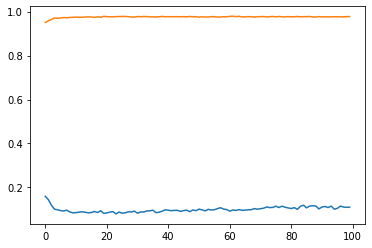

In [60]:
# Visualizing errors and accuracy
print(history.history.keys())

# Network error, blue
plt.plot(history.history['val_loss'])

# Network performance
plt.plot(history.history['val_accuracy'])


In [61]:
# Getting the predictions
predictions = neural_network.predict(X_test)
predictions

array([[3.8553983e-18, 3.1340006e-09, 1.0378201e-08, ..., 1.0000000e+00,
        1.6937921e-15, 3.4591230e-10],
       [3.4774003e-14, 8.0312390e-13, 1.0000000e+00, ..., 1.7102331e-13,
        2.1524870e-16, 2.8707696e-16],
       [1.2672945e-24, 1.0000000e+00, 1.3760570e-10, ..., 5.1481541e-10,
        6.2624455e-17, 1.9898045e-18],
       ...,
       [1.5719781e-16, 1.6038539e-09, 6.1659032e-11, ..., 1.1716272e-08,
        4.1118020e-13, 1.9888168e-08],
       [1.7880123e-22, 2.6458132e-19, 2.4371143e-17, ..., 1.3662631e-17,
        1.0896093e-15, 7.7153796e-17],
       [8.2032490e-15, 9.4195348e-24, 2.5490554e-14, ..., 2.1374105e-28,
        2.4382941e-18, 2.0414476e-19]], dtype=float32)

In [62]:
# Confusion Matrix
y_test_matrix = [np.argmax(t) for t in y_test]
y_predictions_matrix = [np.argmax(t) for t in predictions]

conf_matrix = confusion_matrix(y_test_matrix, y_predictions_matrix)
conf_matrix

# GOOD PERFORMANCE

array([[ 968,    1,    1,    1,    1,    1,    1,    3,    2,    1],
       [   0, 1123,    4,    0,    0,    1,    2,    1,    4,    0],
       [   1,    1, 1015,    1,    1,    0,    2,    6,    4,    1],
       [   0,    0,    4,  990,    0,    4,    0,    4,    4,    4],
       [   2,    1,    4,    0,  953,    0,    7,    0,    0,   15],
       [   3,    0,    0,   10,    1,  866,    4,    1,    4,    3],
       [   5,    3,    2,    0,    3,    5,  939,    0,    1,    0],
       [   2,    5,   10,    2,    1,    0,    0,  999,    1,    8],
       [   5,    2,    6,    4,    4,    7,    0,    5,  936,    5],
       [   2,    4,    0,    4,    5,    1,    0,    5,    1,  987]])

## ***Testing the Model***

In [63]:
# Testing with a new data, formating the array to a matrix
y_train[20]

# Number 4

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [65]:
# Passing the same position for the model to predict
new_data = X_train[20]

# From matrix to vector
new_data = np.expand_dims(new_data, axis = 0) # Expande o tamanho do array

# Prediction
prediction = neural_network.predict(new_data)

# Highest value
prediction = [np.argmax(prediction) for t in prediction]
prediction

# PREDITION CORRECT

[4]